# task-6
**GRIP @ The Sparks Foundation**
**Prediction using Decision Tree Algorithm (Level - Intermediate)**

BY: Jay Prakash Pandey

Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

Problem:

● Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

● Dataset : https://bit.ly/3kXTdox

# 1)Importing Libraries

In [26]:
import pandas as pd             # PANDAS,NUMPY for data manuplation.
import numpy as np              # Numpy for data manuplation like array, matrix
import matplotlib.pyplot as plt  # Matplotlib,seaborn module for Data Visualisation.
import seaborn as sns            
from sklearn.tree import DecisionTreeRegressor  # Importing Decision Tree Regressor, and GridSearchCV for decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV  # Sklearn for predefined functions for Ml.
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score,auc
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 2 Reading data

In [2]:
iris  =pd.read_csv('Iris.csv')
print('Shape of the Dataset-->',iris.shape)
print('dtypes of the Dataset-->',iris.dtypes)
iris.head(5)

Shape of the Dataset--> (150, 6)
dtypes of the Dataset--> Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa




# 3)Data preprocessing of Training Dataset
### checking all the attributes for missing values.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


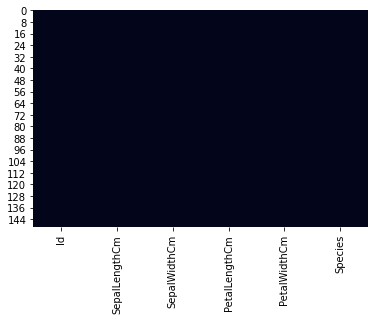

In [3]:
sns.heatmap(iris.isnull(), cbar=False)
print(iris.isnull().sum() )

### Outliers

## Plot of Independent Numerical variable

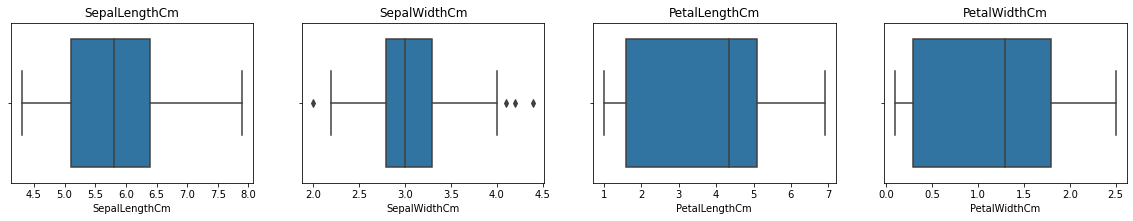

In [4]:
plt.figure(figsize=(20, 10))
X=iris.drop(['Species','Id'], axis=1)
# i: index
for i, col in enumerate(X.columns):
    plt.subplot(3, 4, i+1)
    x = iris[col]
    sns.boxplot(x)
    plt.title(col)


Observed that SepalWidthCm has outliers. To further investigate FacetGrid plot is plotted below

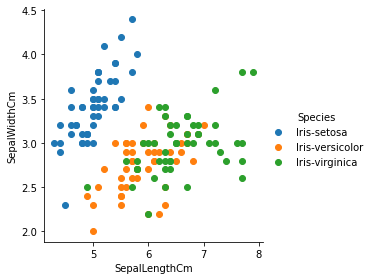

In [5]:
# Plotting species for Sepal
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

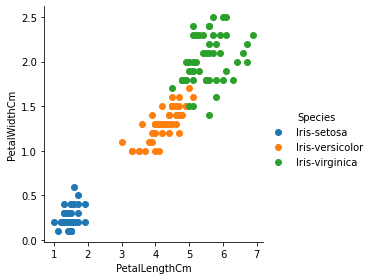

In [6]:
# Plotting species for petals
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

Observed that the species are nearly linearly separable with petal size, but sepal sizes are more mixed.This is an indication that the Petals can help in better and accurate Predictions over the Sepal

###### Plotted Outliers of SepalWidthCm by each Species

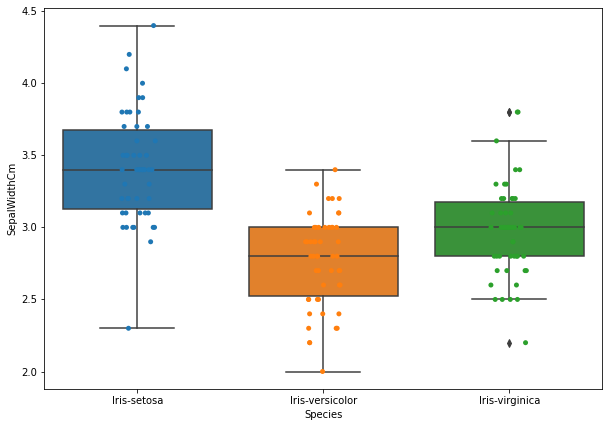

In [7]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='SepalWidthCm',data=iris)
fig=sns.stripplot(x='Species',y='SepalWidthCm',data=iris,jitter=True,edgecolor='gray')

Observed that all the outliers are from Species 'Iris-Virginica'

###### Histogram of Independent Variables

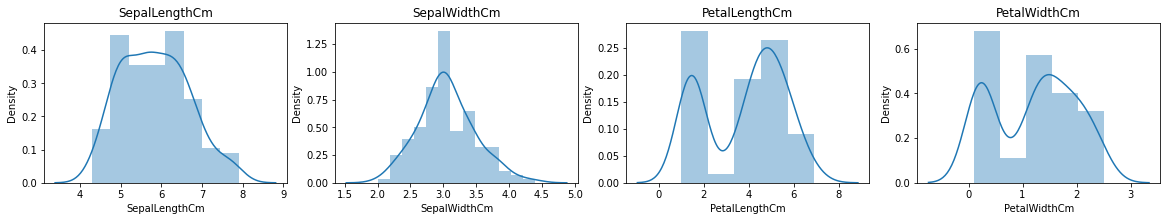

In [8]:
plt.figure(figsize=(20, 10))
df = iris.dropna()
for i, col in enumerate(X.columns):
    plt.subplot(3, 4, i+1)
    x = iris[col]
    sns.distplot(df[col]);
    plt.title(col)


### (b) Summary Statistics

In [9]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


<AxesSubplot:>

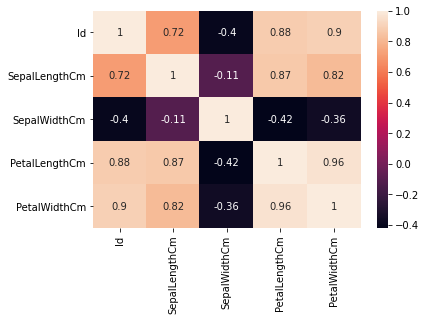

In [10]:

correlation_matrix = iris.corr()
sns.heatmap(data=correlation_matrix, annot=True)

All the Variables are higly correlated except for SepalWidthCM and it is also negatively correlated

### Exploring Independent variables

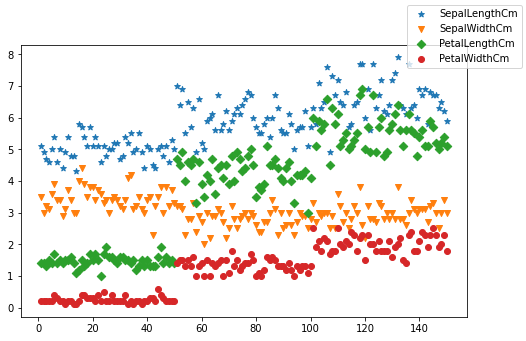

In [11]:
fig = plt.figure(figsize=(8,5))

plt.scatter(x = iris.Id, y = iris.SepalLengthCm, marker = "*")
plt.scatter(x = iris.Id, y = iris.SepalWidthCm, marker = "v")
plt.scatter(x = iris.Id, y = iris.PetalLengthCm, marker = "D")
plt.scatter(x = iris.Id, y = iris.PetalWidthCm, marker = "o")


fig.legend(labels=['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

### Exploring the Dependent variable

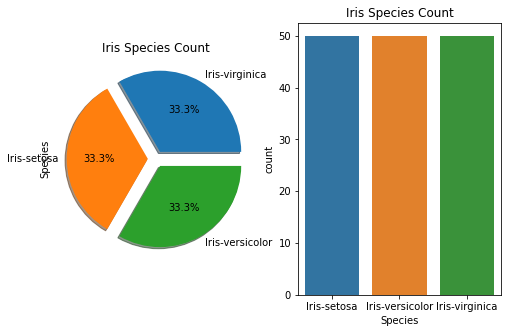

In [12]:
#sns.countplot(x='Species', data=iris)
f,ax=plt.subplots(1,2,figsize=(8,5))
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Iris Species Count')
sns.countplot('Species',data=iris,ax=ax[1])
ax[1].set_title('Iris Species Count')
plt.show()

All the Species are having equal number of observations

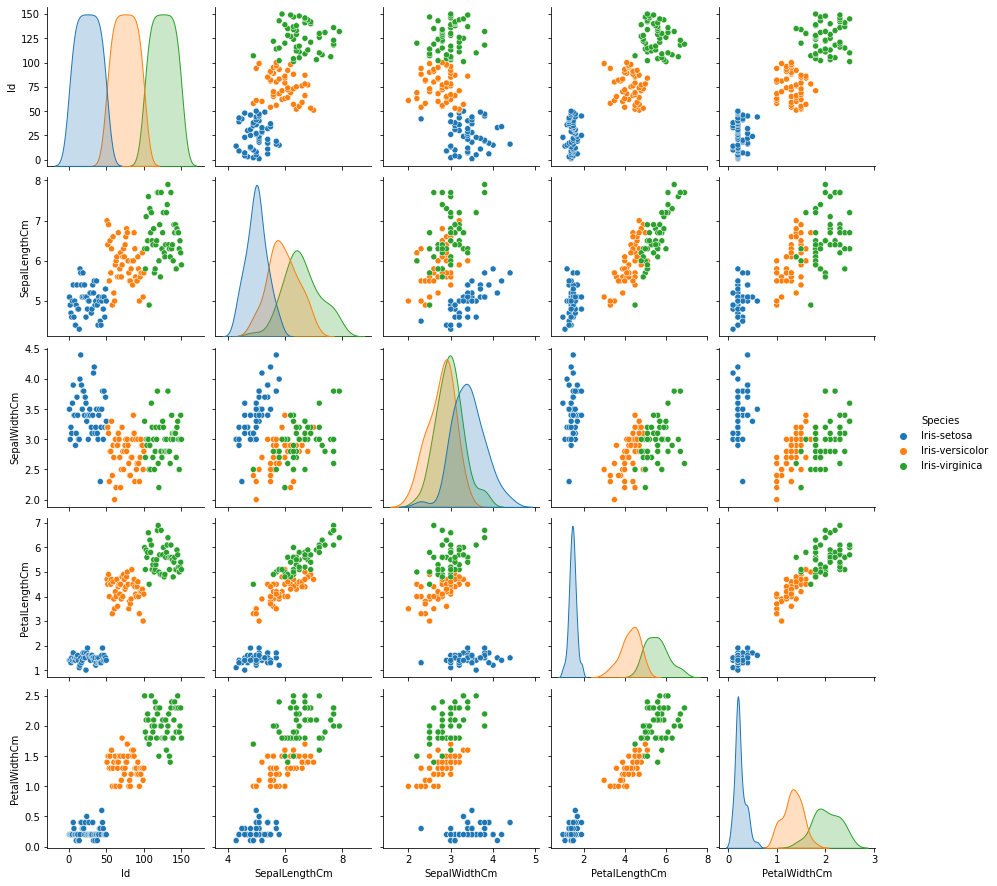

In [13]:
sns.pairplot(data=iris, hue='Species')

### 	Create the target and Predictor matrix:

In [14]:
X = iris.drop(['Species','Id'],axis=1)
Y= iris['Species']

the target variable is "Species",





# 	 Create the split test and training dataset:

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1,stratify=Y)


In [16]:
print(f"X_train shape is {X_train.shape}")
print(f"X_test shape is {X_test.shape}")

print(f"Y_train shape is {Y_train.shape}")
print(f"Y_test shape is {Y_test.shape}")


X_train shape is (112, 4)
X_test shape is (38, 4)
Y_train shape is (112,)
Y_test shape is (38,)


## Build Decision Tree model: Default parameters

In [17]:
import sklearn.tree as tree
clf_d=tree.DecisionTreeClassifier(random_state=23)
clf_d.fit(X_train,Y_train)


DecisionTreeClassifier(random_state=23)

    In the case of a Categorical-valued attribute, split points for branches is where we have lower gini index

### Feature Importance

In [18]:
pd.Series(clf_d.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

PetalWidthCm     0.560702
PetalLengthCm    0.395440
SepalLengthCm    0.026000
SepalWidthCm     0.017859
dtype: float64

### Make predictions on Test dataset

In [19]:
predictions_d = clf_d.predict(X_test)
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions_d}) 
#calculating probabilities of predictions
predict_prob=clf_d.predict_proba(X_test)

df.head()  


,Actual,Predicted
113,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
0,Iris-setosa,Iris-setosa
11,Iris-setosa,Iris-setosa
93,Iris-versicolor,Iris-versicolor


### Performance Metrics Train data

In [20]:
predictions_train = clf_d.predict(X_train)
print('Traning Accuarcy                                 :',clf_d.score(X_train, Y_train))
print('Accuracy score                                   :',accuracy_score(Y_train, predictions_train))
print('classification_report                            :')
print(classification_report(Y_train, predictions_train)) 

Traning Accuarcy                                 : 1.0
Accuracy score                                   : 1.0
classification_report                            :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        37
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       112
      macro avg       1.00      1.00      1.00       112
   weighted avg       1.00      1.00      1.00       112



### Performance Metrics Test data

In [21]:
print('Testing Accuarcy                                 :',clf_d.score(X_test, Y_test).round(4))
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_d).round(4))
print('classification_report                            :')
print(classification_report(Y_test, predictions_d)) 

Testing Accuarcy                                 : 0.9737
Accuracy score                                   : 0.9737
classification_report                            :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



     Lets check the Area under curve and confusion matrix before visualising the decision tree

### Plot confusion matrix 

,Predicted Iris-setosa,"Predicted Iris-versicolor""","Predicted Iris-virginica"""
Actual Iris-setosa,12,0,0
Actual Iris-versicolor,0,13,0
"Actual Iris-virginica""",0,1,12


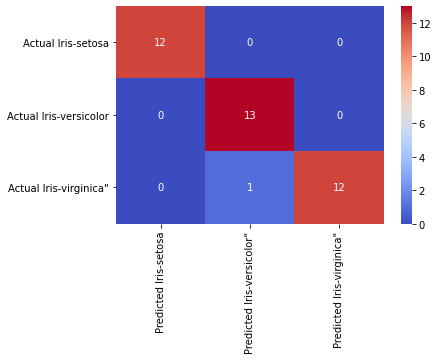

In [22]:
confusion = confusion_matrix(Y_test, predictions_d)
confusion_matrix_d = pd.DataFrame(confusion, index=['Actual Iris-setosa','Actual Iris-versicolor','Actual Iris-virginica"'], columns=['Predicted Iris-setosa','Predicted Iris-versicolor"','Predicted Iris-virginica"'])
_=sns.heatmap(confusion_matrix_d, cmap='coolwarm', annot=True)
confusion_matrix_d




## ROC Curve

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(truth, pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return roc_auc_score(truth, pred, average=average)

def multiclass_roc_auc_plot(truth, pred, average="macro"):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes=3
    
    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(truth[:, i], pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i in (range(n_classes)):
        plt.plot(fpr[i], tpr[i], 
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()


ROC-AUC score of the model   : 0.9805128205128205


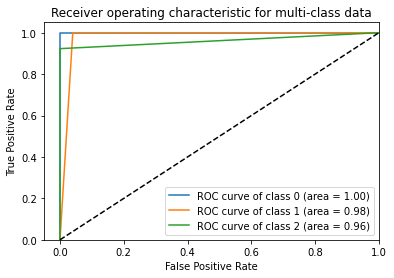

In [24]:
area_UnderCurve_d=multiclass_roc_auc_score(Y_test,predictions_d)
print('ROC-AUC score of the model   :',area_UnderCurve_d)
multiclass_roc_auc_plot(Y_test, predictions_d)

### Observations

    The higher the area under the curve the more it tells how good the classification model is at distinguishing between the classes of species.
                                   
    
                                        

## Decision Tree Visualisation:

In [25]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir)

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
dot_data = tree.export_graphviz(clf_d, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["Iris-virginica","Iris-setosa","Iris-Versicolor"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())

### Interpretation

    In the decision tree chart, each internal node has a decision rule that splits the data. Gini, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

    Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. Let's optimize it    by pruning.

# Optimizing Decision Tree Performance


We will check the optimal depth of tree using hyperparameters

### Selecting the optimal depth of the tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
score_ls = [] 
score_acc_ls = []

for tree_depth in [1,2,3,4,5,6,7,8]:
            tree_model = DecisionTreeClassifier(max_depth=tree_depth,random_state=23)
            tree_model.fit(X_train, Y_train)
            
            scores = cross_val_score(tree_model, X_train,Y_train, cv=10, scoring='accuracy') 
            score_ls.append(np.mean(scores))
            predictions_op = tree_model.predict(X_test)
            acc_scores=  accuracy_score(Y_test, predictions_op)         
            score_acc_ls.append((acc_scores))
    
temp = pd.concat([pd.Series([1,2,3,4,5,6,7,8]), pd.Series(score_acc_ls).round(3)], axis=1)
temp.columns = ['depth', 'Accuracy score']
print(temp)

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(111)
acc_test = []
auc_test = []
for k in range(1,6):
        tree = DecisionTreeClassifier(max_depth=k,random_state=23)
        clf=tree.fit(X_train, Y_train) 
        predictions_test = clf.predict(X_test)
        acc_scores_test = accuracy_score(Y_test, predictions_test) 
        acc_test.append(acc_scores_test)
       
        
       
        scores_test = cross_val_score(clf, X_test,Y_test, cv=10, scoring='accuracy') 
     
        auc_test.append(np.mean(scores_test))
        
ax0.plot(range(1,6),acc_test,label='Accuracy_Test')
ax0.legend()
ax0.set_title('Accuracy-AUC with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.text(3, .92, "optimal tree depth = 3")
plt.show()


    The following chart shows the increase in the value of the Accuracy and the increase in accuracy with respect to number of estimators. Here the X-axis contains the number of estimators while the Y-axis contains the value for  accuracy.
    At depth=3 we see the accuracy is increasing. 

From the graph it is evident that the optimal tree depth is 3.Lets build the decision tree classifier with depth of 3

# Building decision tree with Classifier depth of 3

In [ ]:
clf_op=DecisionTreeClassifier(random_state=11,max_depth=3)
clf_op.fit(X_train,Y_train)


In [ ]:
clf_op.n_features_

### Feature Importance

In [ ]:
pd.Series(clf_op.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

### Make predictions 

In [ ]:
predictions_op = clf_op.predict(X_test)
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions_op})  
predict_prob_op=clf_op.predict_proba(X_test)
df.head()  


### Performance Metrics Train data -Optimal Depth=3

In [ ]:
predictions_train_op = clf_op.predict(X_train)
print('Traning Accuarcy                                 :',clf_op.score(X_train, Y_train))
print('Accuracy score                                   :',accuracy_score(Y_train, predictions_train_op))
print('The number of correctly classified samples       :',accuracy_score(Y_train, predictions_train_op, normalize=False))
print('classification_report                            :')
print(classification_report(Y_train, predictions_train_op))


### Performance Metrics Test data - Optimal depth=3

In [ ]:
print('Testing Accuarcy                                 :',clf_op.score(X_test, Y_test).round(4))
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_op).round(4))
#print('The number of correctly classified samples       :',accuracy_score(Y_test, predictions_op, normalize=False).round(2))
print('classification_report                            :')
print(classification_report(Y_test, predictions_op))


The accuracy is same as compared to previous decision tree for lesser depth of max_depth=3

### Plot confusion matrix

In [ ]:
confusion = confusion_matrix(Y_test, predictions_op)
confusion_matrix_op = pd.DataFrame(confusion, index=['Actual Iris-setosa','Actual Iris-versicolor','Actual Iris-virginica"'], columns=['Predicted Iris-setosa','Predicted Iris-versicolor"','Predicted Iris-virginica"'])
_=sns.heatmap(confusion_matrix_op, cmap='coolwarm', annot=True)
confusion_matrix_op



In [ ]:
area_UnderCurve_op=multiclass_roc_auc_score(Y_test,predictions_op)
print('ROC-AUC score of the model   :',area_UnderCurve_op)
multiclass_roc_auc_plot(Y_test, predictions_d)

In [ ]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir)

In [ ]:
import sklearn.tree as tree
dot_data = tree.export_graphviz(clf_op, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["Iris-virginica","Iris-setosa","Iris-Versicolor"], 
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)
graph_op = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph_op.create_png())

    This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.
    Alternatively, Grid Search to find the hyperparameters tuning along with cross validation is used to increase the prediction rate and the accuracy.

###  HyperParameter Tuning -GridSearch-Cross Validation

In [ ]:
import sklearn.model_selection as model_selection
mod_cv=model_selection.GridSearchCV(clf_d,param_grid=[{'max_depth':[2,3,4,5,6,7,None],"max_features":[1,2,3,4]}],cv=10)
mod_cv.fit(X_train,Y_train)

In [ ]:
mod_cv.best_params_

In [ ]:
model_cv=mod_cv.best_estimator_
print(model_cv)

In [ ]:
mod_cv.best_score_

### Feature Importance

In [ ]:
pd.Series(model_cv.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

### Make predictions 

In [ ]:
predictions_cv = model_cv.predict(X_test)
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions_cv})  
predict_prob_cv=model_cv.predict_proba(X_test)
df.head()  


### Performance Metrics Train data

In [ ]:
predictions_train_cv = model_cv.predict(X_train)
print('Traning Accuarcy                                 :',model_cv.score(X_train, Y_train))
print('Accuracy score                                   :',accuracy_score(Y_train, predictions_train_cv))
print('The number of correctly classified samples       :',accuracy_score(Y_train, predictions_train_cv, normalize=False))
print('classification_report                            :')
print(classification_report(Y_train, predictions_train_cv))


### Performance Metrics Test data

In [ ]:
print('Testing Accuarcy                                 :',model_cv.score(X_test, Y_test))
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_cv))
print('classification_report                            :')
print(classification_report(Y_test, predictions_cv))


### Plot confusion matrix

In [ ]:
confusion = confusion_matrix(Y_test, predictions_op)
confusion_matrix_cv = pd.DataFrame(confusion, index=['Actual Iris-setosa','Actual Iris-versicolor','Actual Iris-virginica"'], columns=['Predicted Iris-setosa','Predicted Iris-versicolor"','Predicted Iris-virginica"'])
_=sns.heatmap(confusion_matrix_cv, cmap='coolwarm', annot=True)
confusion_matrix_cv



In [ ]:
area_UnderCurve_cv=multiclass_roc_auc_score(Y_test,predictions_op)
print('ROC-AUC score of the model   :',area_UnderCurve_cv)
multiclass_roc_auc_plot(Y_test, predictions_d)

We see that the Area under the curve and the confusion matrix predictions precision are same compared to hyperparameter model but here the max_depth =4 and max_features=1 
Lets visualise the tree

## Decision Tree Visualisation:Best Estimator

In [ ]:
dot_data = tree.export_graphviz(model_cv, out_file=None, 
                         feature_names=X.columns,  
                          class_names=["Iris-virginica","Iris-setosa","Iris-Versicolor"], 
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)
graph_grid = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph_grid.create_png())

In [ ]:
model_cv=mod_cv.best_estimator_
model_cv

## Comparing results 

In [ ]:
print('       ############   Metrics with Decision tree-No parameters    ############')
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_d).round(4))
print('Total number of Observations in test sample      :', Y_test.shape)
print('The number of correctly classified samples       :',accuracy_score(Y_test, predictions_d, normalize=False))
print('Area under curve -->',area_UnderCurve_d.round(4))
confusion_matrix_d


In [ ]:
print('       ############    Metrics with Optimal Depth     ############')
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_op).round(4))
print('The number of correctly classified samples       :',accuracy_score(Y_test, predictions_op, normalize=False))
print('Total number of Observations in test sample      :', Y_test.shape)
print('Area under curve -->',area_UnderCurve_op.round(4))
confusion_matrix_op

In [ ]:
print('       ############    Metrics with GridSearch CV    ############')
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_cv).round(4))
print('The number of correctly classified samples       :',accuracy_score(Y_test, predictions_cv, normalize=False))
print('Area under curve -->',area_UnderCurve_cv.round(4))
confusion_matrix_cv

### Observations


        
    To predict the class of species used the following decision tree algorithms:
    1. Decision Tree Classifier - Fully Grown
    2. Decision Tree Classifier - With Optimal Depth 
    3. Decision Tree Classifier - Grid Search
    
    Overall, on all 3 algorithms shows good fit with AUC >96% on train data. The performance of these three decision logics have been validated on test data.The validation results shows AUC > 97% for all three decision logics.
    
    All three decision logics have good accuracy in predicting the classes correctly.
    
     As we can observe here the max_depth=3 which means nodes are expanded until the depth of 3 
    For the max_features=3,features =2 the tree is less complicated and easy to interpret.

### Visualising the Decision Tree with Optimal 'Max_Depth=3' 

##### Text Representation

In [ ]:
text_representation = tree.export_text(clf_op)
print(text_representation)

#### Graph Represntation

In [ ]:
Image(graph_op.create_png())

### Interpretation